# Neural Network Methodology and Implementation

## ----With example model built on Iris Dataset


Artificial neural network (ANN) is a classic machine learning algorithm. Different from most of the other machine learning algorithms, which are derived from statistics, ANN is inspired by biology and derived from an engineering standpoint. It is modeled after the human brain and tries to mimic how the human brain works in some degree. 

Over the years, there are many different neural network algorithms being derived from the most original form, such as convolutional neural network (CNN), recurrent neural network (RNN), long short term memory network (LSTM) and etc. They’ve been proved to be very successful in some challenging problems such as computer visions, voice recognition and etc. 

With this in mind, this tutorial will try to focus on the most original form of neural network - feedforward neural network. For convenience purpose, I’ll refer to feedforward neural network simply as neural network (NN) in the remaining content. The tutorial will start with the explanation of the algorithm, then move forward to the implementation and end with a concrete example.

## Part I: Basic Structure of Neural Network

The basic structure of the neural network can be seen as the diagram below. Each circle in the diagram represents a basic unit of the network - a neuron. 

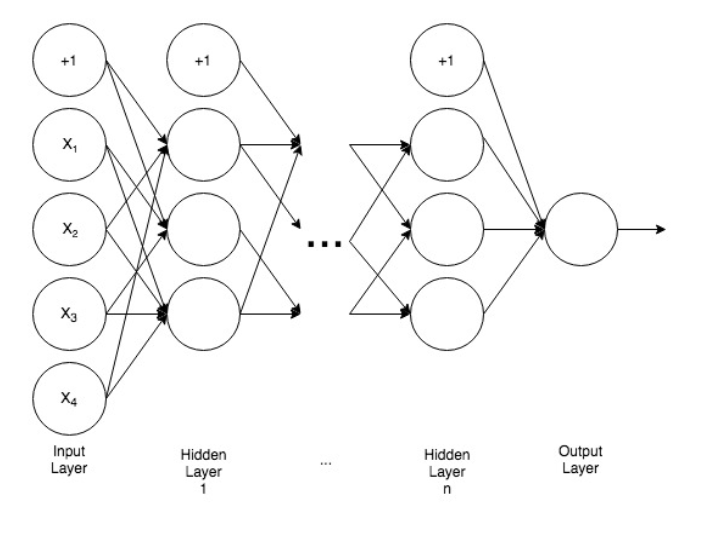

There are several different layers of neuron in the diagram. 

The leftmost layer is called input layer. Parameters such as $x_1, x_2, x_3, x_4$ are the input variables. The rightmost layer is called output layer, which represent the output of the network. Note that the output layer can contains more than one neuron. For example, when the neural network is used as a classifier, usually there will be a separate neuron for each label. All the other layers between the input layer and the output layer are called hidden layers. Each hidden layer will take inputs from the previous layer and pass its outputs to the next layer. 

Note that there is a constant input parameter set as $+1$ for each layer in the diagram. They are called bias node, which can be used to shift the activation function. 

Each arrow represents a connection between two neurons. Each connection can only points to a neuron in the next layer and is assigned with a certain weight. When the network starts to work, each neuron will take inputs from all the neurons that are connected to it and multiply each input by the weight of the connection. After that, it will aggregate the values and use an activate function (step function) to calculate its output value. The process will be completed layer by layer. At the end, the output layer will generate the result.

## Part II: Twp types of Neuron Model: Perceptron & Sigmoid Neuron

### 1. Artificial Neuron Model: Perceptron

#### How does perceptron work?

Perceptron is an artificial neuron, which takes several binary variable as inputs and creates another binary variable as output. 

To fit this model, each variable takes a weight and this whole model has a bias term. which could be written in this linear model:

$\begin{eqnarray}f(x)=\sum w_i x_i + b\tag{1}\end{eqnarray}$

(x: binary input 0 / 1;  w: weight; b: bias)

If we want to convert the sum into a binary output, we also need to set a threshold. For example, if the sum value is larger than the threshold number, then the perceptron will produce 1 as the final output.

$\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if }\sum w_i x_i + b \leq 0 \\
      1 & \mbox{if } \sum w_i x_i + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}$

Notes:

If we use $x_0 = 1$ to represent a constant input and it has $w_0$ as its weight, so $w_0x_0$ could be used to represent for the bias term, and the function above could be simplified as:

$\begin{eqnarray}f(x)=\sum w_i x_i\tag{3}\end{eqnarray}$

### 2. Artificial Neuron Model: Sigmoid Neuron

Since some very small changes in weight or bias might cause the binary output completely flip, and perceptron model could not handle the non-linear-seperable dataset, so we need to introduce a nonlinear transformation function to make neural network work well both for regression and classification problems. One of the common nonlinear transformations is called sigmoid function, and the modified model is called sigmoid neuron model.

Similar with perceptron model, the sigmoid neuron model also have several inputs and respective weights, bias and only one output. But unlike perceptron which take binary variable as inputs and produce 0 or 1 as output, sigmoid neuron accept valid input values ranging between 0 to 1, and its output will apply the sigmoid function and will be: $\sigma(w \cdot x+b)$.

Since the sigmoid function: $\begin{eqnarray}\sigma(x)=\frac{1}{1+e^{-x}}\tag{4}\end{eqnarray}$ so the output will be:

$\begin{eqnarray} 
  \frac{1}{1+\exp(-\sum w_j x_j)}.
\tag{5}\end{eqnarray}$

Notes: 

1. $\sum w_j x_j$ represents for the weighted sum of all input variables and the bias;
2. The derivative of the sigmoid function is $\dfrac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x))$.

If you are interested in the derivation process, you could refer to https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x.

Now, let's write this sigmoid function in python and see how we could visualize it!

In [72]:
import numpy as np

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# the derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Import the pyplot function in matplotlib to draw the plot.

In [73]:
import matplotlib
# Use svg backend for better quality
# AUTOLAB_IGNORE_START
matplotlib.use("svg")
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
# AUTOLAB_IGNORE_START
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen
# AUTOLAB_IGNORE_STOP

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [74]:
def visualize_sigmoid_weight():
    # np.arange(start_value, stop_value, interval)
    # x is an one-dimensional array with 200 elements
    x = np.arange(-10, 10, 0.1)
    # w: various value of w0
    w = [0.5, 1, 2]
    result = []
    labels = []
    for i in w:
        y = [sigmoid(i * j) for j in x]
        result.append(plt.plot(x, y))
        labels.append('sigmoid(' + str(i) + '*x)')
    plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    return result

In [75]:
# visualize_sigmoid_weight()

From the plot, we could know that changing the weight $w_0$ will essentially change the "steepness" of the sigmoid.
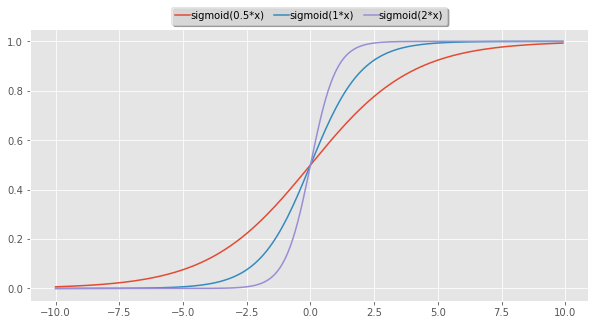

However, if we want to shift the curve to fit the data, for example, we want the output to be $1$ when input is $-2$, then we need to add the bias term.

In [76]:
def visualize_sigmoid_bias():
    # np.arange(start_value, stop_value, interval)
    # x is an one-dimensional array with 200 elements
    x = np.arange(-10, 10, 0.1)
    # b: various value of bias
    b = [-5, 0, 5]
    result = []
    labels = []
    for i in b:
        y = [sigmoid(j + i) for j in x]
        result.append(plt.plot(x, y))
        labels.append('sigmoid(x + 1.0 * ' + str(i) + ')')
    plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    return result

In [77]:
#visualize_sigmoid_bias()

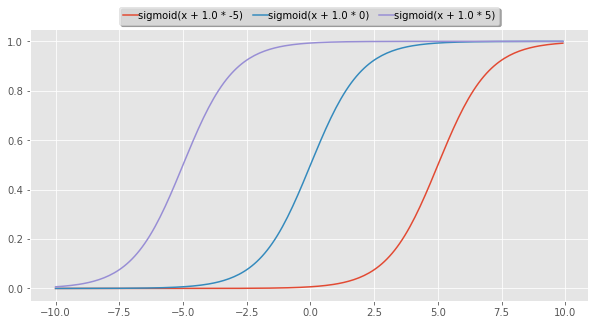

After adding weight and bias term, the curve have different steepness and could shift to different direction to fit the model.

## Part III: Loss Function
We use sum-of-square errors as the measure for model fitting, which means the loss function is: 
$\begin{eqnarray}
  \ell = \frac{1}{2} \sum (y_i - f(x_i))^2.
\tag{6}\end{eqnarray}$

So, our learning optimization problem is to find the parameters that could minimize: (j represent for the $j^{th}$ variable and i represent for $i^{th}$ input data)

$\begin{eqnarray}
  \frac{1}{m} \sum_{i=1}^m \left (\sum_{j=1}^n \theta_j x^{(i)}_j - y^{(i)} \right )^2
 \tag{7}\end{eqnarray}$ 

## Part IV: Learning Algorithm: Gradient Descent 

Gradient descent is an iterative function that take small steps in the derivative of the **negative partial derivatives** to update the parameters (the weights of each variable).

By calculating current derivative (which could also be called steepness) and make relative adjustment, gradient descent is used for sub-field optimization. 

$\begin{eqnarray}
  w \rightarrow w' = w -\eta \nabla C.
\tag{8}\end{eqnarray}$

$\nabla C$ represents for the gradient vector of the original function, (vectors combined from partial derivatives of different variables), $\eta$, also called as **learning rate**, is a small and positive parameter to represent for how much should the current derivative be adjusted in each step. With these slightly moves, the current derivative will finally converge to zero, and this stopping point is called convergence.

However, there are still some problems with the gradient descent:

**1.What if overshoot?**

Overshoot means that the current derivative has been over-adjusted and moved to the opposite position directly without reaching the target optimized point (where the current derivative should equal to zero). 

Solution: This problem could be caused by a large slope. To solve this, we could choose a  smaller learning rate to adjust the step size.

**2.What if the slope is too small?**

In this problem, if the slope is small and the learning rate is also small, it will take longer time for the model to converge and it will be more likely to stop at a local minimum instead of a global best location.

Solution: Increasing the learning rate could help in this situation.

**3.What if stop at a local minimum?**

Since the gradient descent could only find out the stopping point where the derivative equals to 0, so this algorithm cannot make sure to stop at the global optimized point. 

Solution: To solve this problem, a good way is to start the iterative algorithm from different random states.




## Part V: Multi-layer Training:  FeedForward & BackPropagation

Multi-layer networks applies a variety of training methods, here we are going to introduce feedforward and backpropagation. 

In this combined method, the feedforward algorithm will first calculate the target_output from the input vector, and then use backpropagation algorithm to compare the target_output with the correct answer to compute the error based on some predifined cost function. Then, the error will be fed back through the network and the algorithm will adjust the weights of each connection using gradient descent, which we have introduced above.

After iterating this process sufficiently, the network will finally converge to some state where the error is small enough to meet the stopping criteria. Then we could say that the network has learned from the target function.

Notes:
1. Feed-forward is an algorithm to calculate target_output vector from input vector. Input for feed-forward is input_vector, output is output_vector.

2. Backpropagation is an algorithm to train (adjust weight) the neural network. Input for backpropagation is output_vector, target_output_vector, output is adjusted_weight_vector.

3. Useful reference: 
https://en.wikipedia.org/wiki/Feedforward_neural_network

### Steps:

**1.Input:**

Set the input data $a^0$ in the input layer $l^0$

**2.FeedForward: **

For each layer, $l=1,2,3,...$ (output and hidden layers), compute the target_output for next layer.

$\begin{eqnarray}
  z^{l} = w^{l-1} a^{l-1}.
\tag{9}\end{eqnarray}$


**3.Calculate error delta vector:**  

For each layer, $l=1,2,3,...$ (output and hidden layers), calculate the error delta value using 

$\begin{eqnarray}
\delta^{l} = \nabla_a C \odot \sigma'(z^l).
\tag{10}\end{eqnarray}$

**4.Backpropagate the error:**

For output layer, 

$\begin{eqnarray}
 error^{L}=z^{L} - y.
\tag{11}\end{eqnarray}$

For hidden layers,

$\begin{eqnarray}
 error^{l} = ((w^{l+1})^T \delta^{l+1}) \odot \sigma'(z^{l}).
\tag{12}\end{eqnarray}$

**5.Update the weight:**

For each layer in input and hidden layers:

$\begin{eqnarray}
 w^{l} = w^{l} - \eta ((z^{l})^T \odot \delta^{l+1}).
\tag{13}\end{eqnarray}$

----------------------------------------

Now let's make some pseudo data to see how this works.


Input1: 0, 0, 1, 1

Input2: 0, 1, 0, 1

Input3: 1, 1, 1, 1

Target: 0, 1, 1, 0

Here we assume there will be 1 hidden layer and 4 hidden nodes.

**Steps:**

1. Define feedforward & backpropagation iteration function to call the gradient descent iteratively until: a. it has already iterated for certain times (for example: 10000 times); b. the error difference between two iteration is smaller than a certain amount (for example: $10^{-6}$).
2. Define the input data and set different learning rate.
3. Draw the plot to see how learning rate influence the converge process.

In [285]:
import numpy as np

def iteration(x, y, eta, hidden_nodes, iteration_times):
    # randomly initialize weights between [0,1)
    # In order to compare how the learning rate influence the converge process,
    # np.random.seed(0) will help create the same set of randome numbers every time.
    np.random.seed(0)
    
    # weight_0: initial weight for input layer
    # weight_0 = np.random.random((input attributes number,hidden nodes number))
    # weight_1: initial weight for hidden layer
    # weight_1 = np.random.random((hidden nodes number,output value number))
    weight_0 = np.random.random((x.shape[1],hidden_nodes))
    weight_1 = np.random.random((hidden_nodes,y.shape[1]))
    
    curr_error = 0
    prev_error = 0
    
    error = []
    
    for i in range(iteration_times):
        # Feedforward
        # initiate input layer
        layer_0 = x
        # initiate hidden layer
        layer_1 = sigmoid(np.dot(layer_0, weight_0))
        # initiate output layer
        layer_2 = sigmoid(np.dot(layer_1, weight_1))
        
        # Backpropagation
        # 1. calculate respective error & gradient value in each layer
        layer_2_error = layer_2 - y
        layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(weight_1.T)
        layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
        
        # 2. update weights
        weight_1 -= eta * (layer_1.T.dot(layer_2_delta))
        weight_0 -= eta * (layer_0.T.dot(layer_1_delta))
        
        # 3. update previous error and current error to decide whether continue iteration or not.
        prev_error = curr_error
        curr_error = np.mean(np.square(layer_2_error))
        error.append(curr_error)
        
        # The codes below is used to check whether the error difference has meet the stopping criteria or not.
        # Since we want to first plot how the error change in 1000 iteration times, we temporarily comment this.
#         if (np.abs(prev_error - curr_error) < 0.000001):
#             break
        
    return weight_0, weight_1, error
        
    

In [286]:
def test_gradient_descent():
    x = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
    y = np.array([[0,1,1,0]]).T
    eta_list = [0.01, 0.05, 0.1, 0.2, 0.5]
    hidden_nodes = 4
    iteration_times = 1000
    
    # plot the curves in same graph with respective labels
    result = []
    labels = []
    for eta in eta_list:
        weight_0, weight_1, error = iteration(x, y, eta, hidden_nodes, iteration_times)
        result.append(plt.plot(np.arange(1, len(error) + 1, 1), error))
        labels.append('learning rate: ' + str(eta))
    plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    return result

In [287]:
# test_gradient_descent()

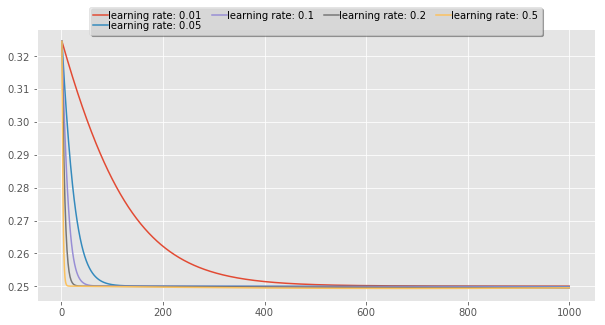

From the graph above, we could know that a lower learning rate will take longer time for the model to converge, it will help avoid an overshooting problem, but it might also get stuck in local minumum. So, instead of choosing a stable learning rate, another good technique is to combine **Adam optimizer** and **early stopping** together. 

Notes:

**Adam optimizer** is an algorithm used in gradient descent procedure to tune the learning rate dynamically and update the network weights.

For further reference, here is a good reading material. https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

## Part VI: Predict the category of iris dataset

This is a concrete example of how to use this model to predict practical problem. In this problem, we will use one-hidden-layer model. 

Data Source: https://archive.ics.uci.edu/ml/datasets/iris

All the input data has already been normalized. 

Input: 
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm

Output: 
1. Species



### 1. Read and Preprocess Data

Steps:

1. read data and check for missing values
2. convert 3 kinds of species into 3 binary format
3. add additional column for bias term

In [237]:
import pandas as pd
df = pd.read_csv('iris.csv')
print(df[:5])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [238]:
# check missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [239]:
# create binary representation for each category
df["setosa"] = df["Species"].map({
    "Iris-setosa": 1,
    "Iris-versicolor": 0,
    "Iris-virginica": 0}).astype(float)
df["versicolor"] = df["Species"].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 0}).astype(float)
df["virginica"] = df["Species"].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 0,
    "Iris-virginica": 1}).astype(float)
# add another column for bias term
df['bias'] = float(1)
df = df.drop(['Species'],axis=1)

In [240]:
print(df[:5])

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  setosa  \
0            5.1           3.5            1.4           0.2     1.0   
1            4.9           3.0            1.4           0.2     1.0   
2            4.7           3.2            1.3           0.2     1.0   
3            4.6           3.1            1.5           0.2     1.0   
4            5.0           3.6            1.4           0.2     1.0   

   versicolor  virginica  bias  
0         0.0        0.0   1.0  
1         0.0        0.0   1.0  
2         0.0        0.0   1.0  
3         0.0        0.0   1.0  
4         0.0        0.0   1.0  


In [241]:
x = pd.DataFrame.as_matrix(df[['bias','SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
y = pd.DataFrame.as_matrix(df[['setosa', 'versicolor', 'virginica']])

## 2. Build Neural Network Model

In this part, we could train this model by tuning different parameters:

1. the number of hidden nodes
2. learning rate
3. stop criteria

In [288]:
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def iteration(x, y, eta, hidden_nodes, iteration_times):
    weight_0 = np.random.random((x.shape[1],hidden_nodes))
    weight_1 = np.random.random((hidden_nodes,y.shape[1]))
    
    curr_error = 0
    prev_error = 0  
    
    for i in range(iteration_times):
        # 1. feedforward
        layer_0 = x
        layer_1 = sigmoid(np.dot(layer_0, weight_0))
        layer_2 = sigmoid(np.dot(layer_1, weight_1))
        
        # 2. backpropagation
        layer_2_error = layer_2 - y
        layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
        layer_1_error = layer_2_delta.dot(weight_1.T)
        layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
        
        # 3. update weight
        weight_1 -= eta * (layer_1.T.dot(layer_2_delta))
        weight_0 -= eta * (layer_0.T.dot(layer_1_delta))
        
        
        prev_error = curr_error
        curr_error = np.mean(np.square(layer_2_error))
        
#         if (i% 20) == 0:
#             print(str(curr_error))
        
        if (curr_error < 0.01 or np.abs(prev_error - curr_error) < 0.00000001):
            print("Itereration times when stop: " + str(i))
            break
    
    return weight_0, weight_1, curr_error

def predict(x, y):
    # Use the train_test_split() in sklearn to split the original data.
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    # We set 9 hidden nodes.
    # We set the learning rate at 0.1 and maximum iteration times at 40000
    weight_0, weight_1, curr_error = iteration(X_train, y_train, 0.1, 9, 40000)
    
    # In the test data
    layer_0 = X_test
    layer_1 = sigmoid(np.dot(layer_0,weight_0))
    layer_2 = sigmoid(np.dot(layer_1,weight_1))
    
    # Convert the float number in the layer_2 (output layer) to 3 binary number.
    result = []
    size = layer_2.shape[1]
    for arr in layer_2:
        max_index = np.argmax(arr)
        tmp = [float(1) if i == max_index else float(0) for i in range(size)]
        result.append(tmp)
    predicted_result = np.array(result)
    
    # Get the correctly classified and misclassified count
    test_size = len(y_test)
    true_count = 0
    false_count = 0
    for i in range(test_size):
        if np.array_equal(y_test[i], predicted_result[i]):
            true_count += 1
        else:
            false_count += 1
    print("Test Size: " + str(test_size))
    print("Misclassified number: " + str(false_count))
    
    precision = float(true_count) / (true_count + false_count)
    print("Predict precision: " + str(precision))
    
    return y_test, predicted_result

In [289]:
y_test, predicted_result = predict(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Itereration times when stop: 10766
Test Size: 45
Misclassified number: 0
Predict precision: 1.0


One the running result:

Itereration times when stop: 10766

Test Size: 45

Misclassified number: 0

Predict precision: 1.0